In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import constants
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

### 1\.

Give an estimate, with the related error, of the net magnetic moment of the sample. Remember that glycerin $(\text{C3H8O3})$ has a molar mass of $92.09382 \; g/mol$ and its density is $1.26 \; g/cm^3$.

In [2]:
h = [2.0, 0.2]
d = 0.8

vol1 = ((d / 2)**2) * constants.pi * h[0]
vol2 = (np.pi * h[1] / 2) * ((d / 2)**2 + ((h[1]**2) / 3))

total_volume = vol1 + vol2
approx_vol = vol1 = ((d / 2)**2) * constants.pi * (h[0] + h[1])

print(f"Total volume with spherical cap: {total_volume} cm^3")
print(f"Approximated volume (cylinder): {approx_vol} cm^3")

DeltaV = 0.159174

Total volume with spherical cap: 1.059763921810957 cm^3
Approximated volume (cylinder): 1.1058406140636075 cm^3


In [3]:
molar_mass = 92.09382
density = 1.26
spins_per_atom = 8

gyromag_ratio = 42.5756 * 10**6
mean_mu = gyromag_ratio * constants.hbar / 2

n_spins = spins_per_atom * density * total_volume * constants.N_A / molar_mass
error_n_spins = spins_per_atom * density * DeltaV * constants.N_A / molar_mass

print(f"Total number of spins: {n_spins} +/- {error_n_spins}")
print(f"Net magnetic moment: {mean_mu * n_spins} +/- {mean_mu * error_n_spins}")

Total number of spins: 6.9853806581064174e+22 +/- 1.0491874256045608e+22
Net magnetic moment: 0.0001568184004581859 +/- 2.3553747736454795e-05


### 2\.

Report the experimental parameters used in your experiment:
- measured Bfield, current flowing in the electromagnet
- drive generator and local oscillator generator frequencies ($\nu_{RF}$ and $\nu_{LO}$ respectively)
- the Larmor frequency of the precessing spins for the measured B.

Remember that for protons the gyromagnetic ratio is $\gamma_p = 42.5756 \;MHz/T$

In [5]:
error = round(24.285/35, ndigits=3)
error/gyromag_ratio

1.6300416200828644e-08

In [4]:
measured_Bfield = 0.571
flowing_current = 8.891

rf_frequency = 24.33
lo_frequency = 24.3085

larmor_frequency = - measured_Bfield * gyromag_ratio

print(f"Larmor frequency of the precessing spins for the measured B: {larmor_frequency * 10**-6} MHz")

Larmor frequency of the precessing spins for the measured B: -24.310667599999995 MHz


### 3\.

Show in a plot the free induction decay signal recorded after a $\frac{\pi}{2}$-pulse, and report the $T^{⋆}_2$ obtained by the fit. Display in the same plot the fit curve. Make a plot of the residuals and briefly describe your error analysis

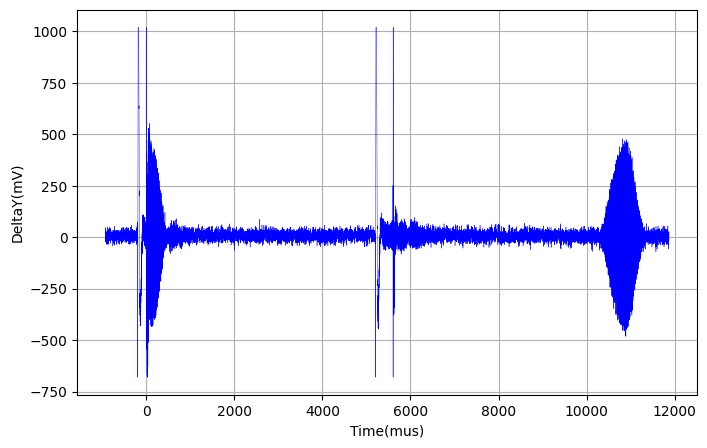

In [6]:
fid_signal = pd.read_csv("File1/File1_nozoom.csv", skiprows = lambda x: x % 50 != 0, engine="python")
fid_signal.iloc[:, 0] *= 10e5
fid_signal.iloc[:, 1] *= 10e2
fid_signal.columns = ["Time(mus)", "DeltaY(mV)"]

fig = plt.figure(figsize=(8, 5))

plt.plot(fid_signal.iloc[:, 0], fid_signal.iloc[:, 1], color = "blue", linewidth = 0.3)
plt.xlabel("Time(mus)")
plt.ylabel("DeltaY(mV)")
plt.grid(True)

plt.show()

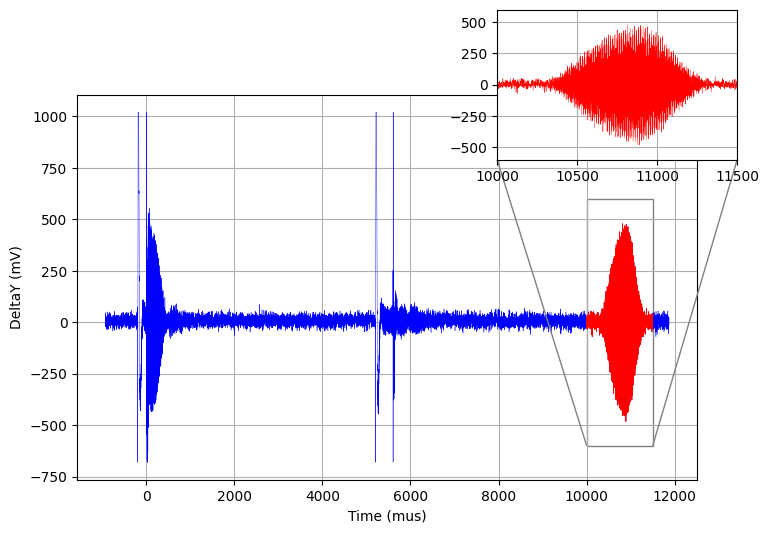

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# Plot originale
fig, ax = plt.subplots(figsize=(8, 5))

# Plot principale
ax.plot(fid_signal.iloc[:, 0], fid_signal.iloc[:, 1], color="blue", linewidth=0.3)
ax.set_xlabel("Time (mus)")
ax.set_ylabel("DeltaY (mV)")
ax.grid(True)

# Riquadro di zoom
zoom_factor = 0.1  # fattore di zoom
x_zoom_range = (10000, 11500)  # intervallo di zoom sull'asse x

# Calcola il range sull'asse y in base al fattore di zoom
y_range_zoom = (-600, 600)  # intervallo di zoom sull'asse x

# Disegna il riquadro di zoom
ax_zoom = fig.add_axes([0.65, 0.75, 0.3, 0.3])  # specifica la posizione e le dimensioni del riquadro di zoom
ax_zoom.plot(fid_signal.iloc[:, 0], fid_signal.iloc[:, 1], color="red", linewidth=0.3)
ax_zoom.set_xlim(x_zoom_range)
ax_zoom.set_ylim(y_range_zoom)
ax_zoom.grid(True)

x_start, x_end = x_zoom_range
y_start, y_end = y_range_zoom

# Linee verticali
#ax.vlines(x_start, y_start, y_end, colors='red', linestyles='dashed', linewidth=1)
#ax.vlines(x_end, y_start, y_end, colors='red', linestyles='dashed', linewidth=1)

# Linee orizzontali
#ax.hlines(y_start, x_start, x_end, colors='red', linestyles='dashed', linewidth=1)
#ax.hlines(y_end, x_start, x_end, colors='red', linestyles='dashed', linewidth=1)

# Linee di collegamento
ax.plot([x_start, x_start], [0.5 * (y_start + y_end), 0.5 * (y_start + y_end)], color='red', linestyle='dashed', linewidth=1)
ax.plot([x_end, x_end], [0.5 * (y_start + y_end), 0.5 * (y_start + y_end)], color='red', linestyle='dashed', linewidth=1)

mask = (fid_signal.iloc[:, 0] >= x_start) & (fid_signal.iloc[:, 0] <= x_end)
ax.plot(fid_signal[mask].iloc[:, 0], fid_signal[mask].iloc[:, 1], color="red", linewidth=0.5)

# Use mark_inset to add magnifying glass effect
mark_inset(ax, ax_zoom, loc1=3, loc2=4, fc="none", ec="0.5")

plt.show()


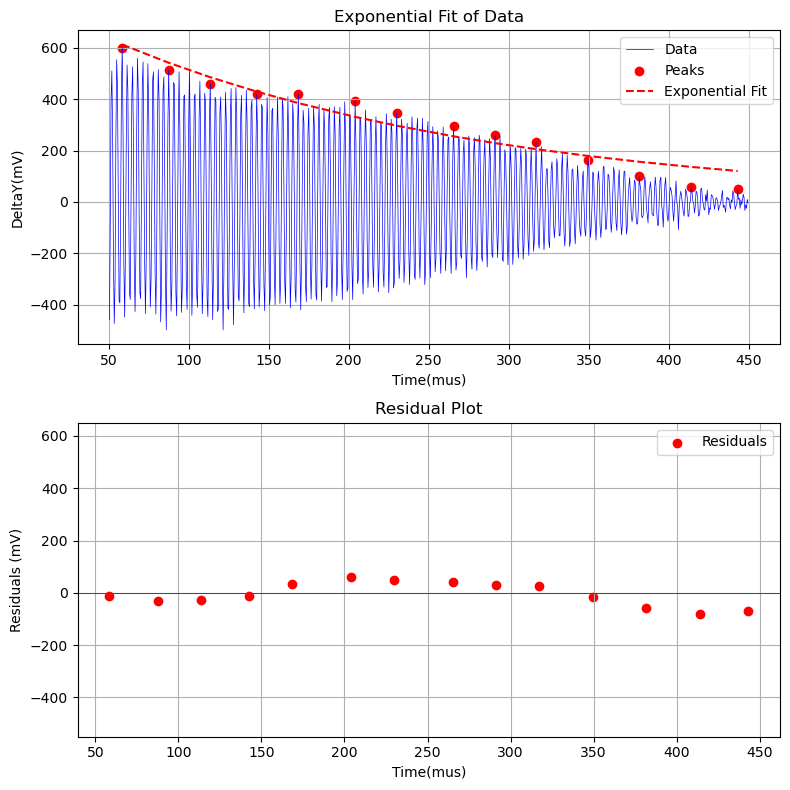

Amplitude: 784.2265414996688
T2*: 236.63993641217826 +/- 22.810894220165807


In [8]:
def exponential_func(x, a, tau):
    return a * np.exp(-x / tau)

fid_signal = pd.read_csv("File5/File5_fid.csv", skiprows= lambda x: x % 10 != 0, engine="python")
fid_signal.iloc[:, 0] *= 10e5
fid_signal.iloc[:, 1] *= 10e2
fid_signal.columns = ["Time(mus)", "DeltaY(mV)"]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
    
# Find peaks and perform exponential fit
peaks_ind, _ = find_peaks(fid_signal.iloc[:, 1], height=0, prominence=0.5, distance=50)
x_peaks = fid_signal.iloc[:, 0][peaks_ind]
peaks = fid_signal.iloc[:, 1][peaks_ind]
popt, pcov = curve_fit(exponential_func, x_peaks, peaks, p0=[600, 200])
std_dev_T2 = np.sqrt(pcov[1, 1])

# Plot the exponential fit on the first subplot
axes[0].plot(fid_signal.iloc[:, 0], fid_signal.iloc[:, 1], label='Data', color = "blue", linewidth = 0.5)
axes[0].scatter(x_peaks, peaks, label='Peaks', marker='o', color = "red")
axes[0].plot(x_peaks, exponential_func(x_peaks, *popt), label='Exponential Fit', color = "red", linestyle='--')
axes[0].set_xlabel("Time(mus)")
axes[0].set_ylabel("DeltaY(mV)")
axes[0].set_title('Exponential Fit of Data')
axes[0].legend()
axes[0].grid(True)

# Calculate the fitted values and residuals
fitted_values = exponential_func(x_peaks, *popt)
residuals = peaks - fitted_values

# Plot the residuals on the second subplot
axes[1].scatter(x_peaks, residuals, label='Residuals', marker='o', color = 'r')
axes[1].axhline(y=0, color='b', linestyle='-', linewidth=0.5)  # Add horizontal line at y=0 for reference
axes[1].set_xlabel(fid_signal.columns[0])
axes[1].set_ylabel('Residuals (mV)')
axes[1].set_ylim([-550, 650])
axes[1].set_title('Residual Plot')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

print(f"Amplitude: {popt[0]}")
print(f"T2*: {popt[1]} +/- {std_dev_T2}")

File1:

Amplitude: 804.6550545127701
T2*: 250.014741463898 +/- 18.33698510363222
Root Mean Square Error (RMSE): 48.26461750727858
Mean Absolute Error (MAE): 40.50849104239279


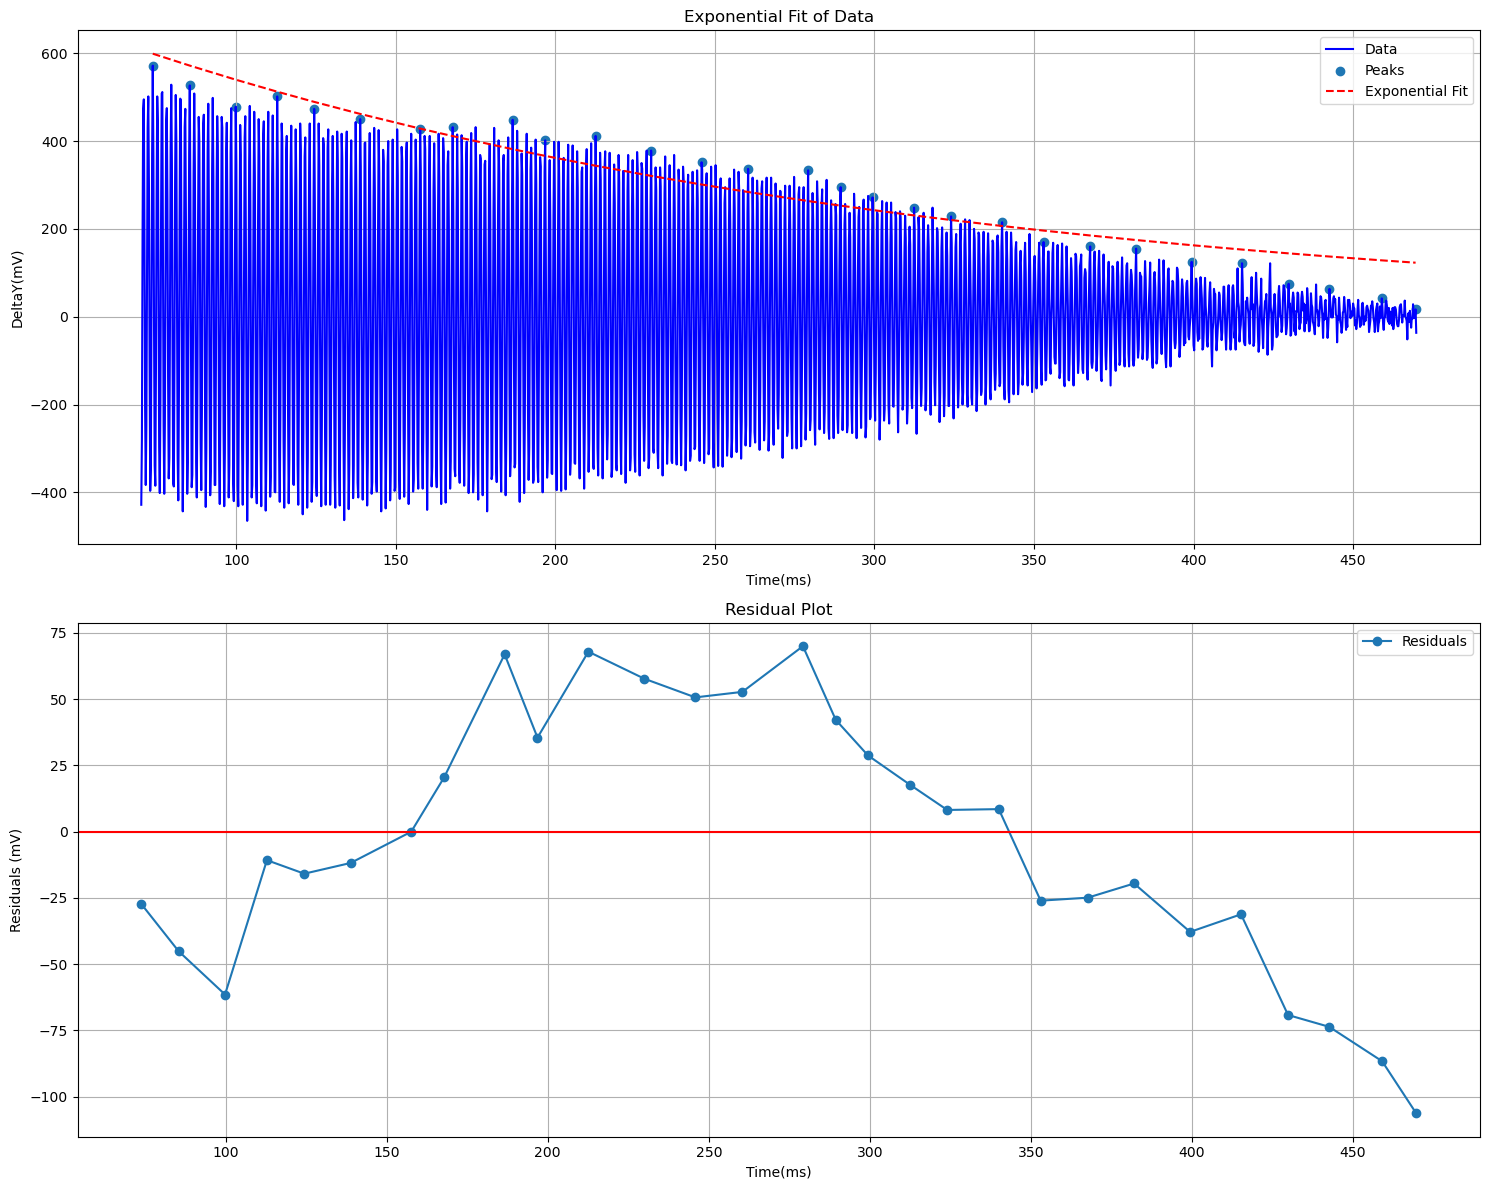

File2:

Amplitude: 884.5425191465281
T2*: 206.39846880365724 +/- 6.579731350471013
Root Mean Square Error (RMSE): 33.88363638346854
Mean Absolute Error (MAE): 28.966626723759966


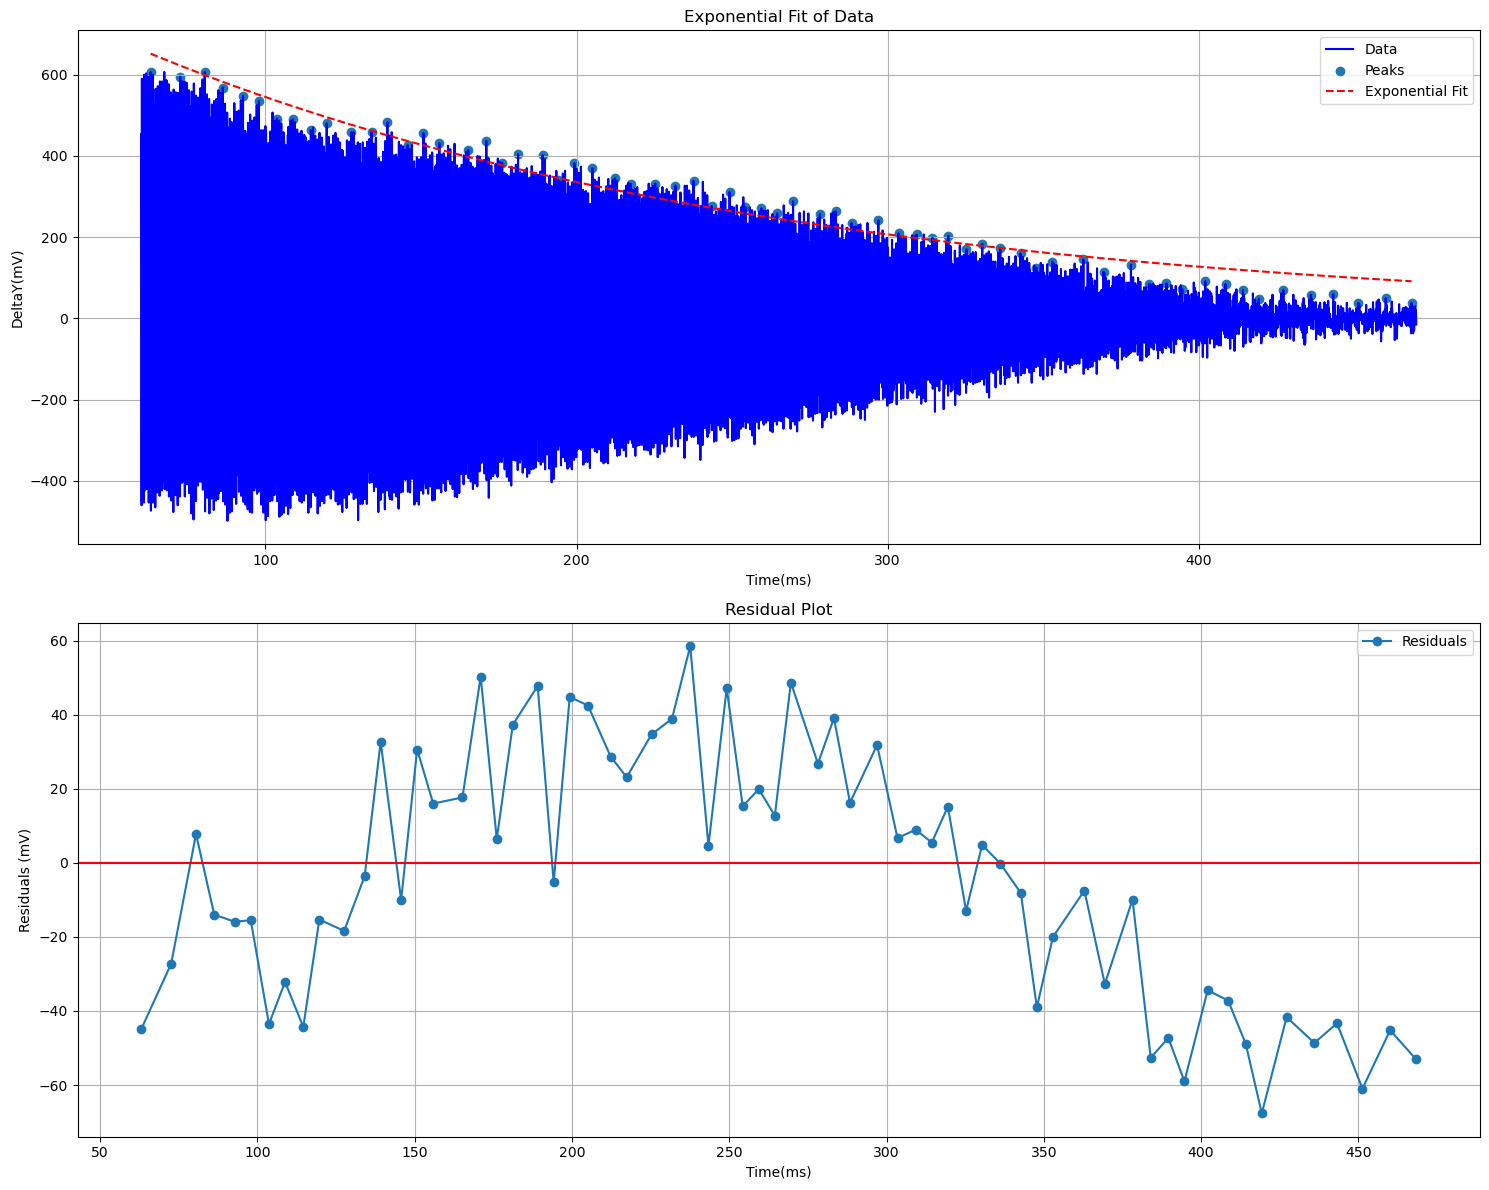

File3:

Amplitude: 778.0642654418017
T2*: 255.96468438450864 +/- 10.609143963351364
Root Mean Square Error (RMSE): 42.07933818223849
Mean Absolute Error (MAE): 35.25035010653428


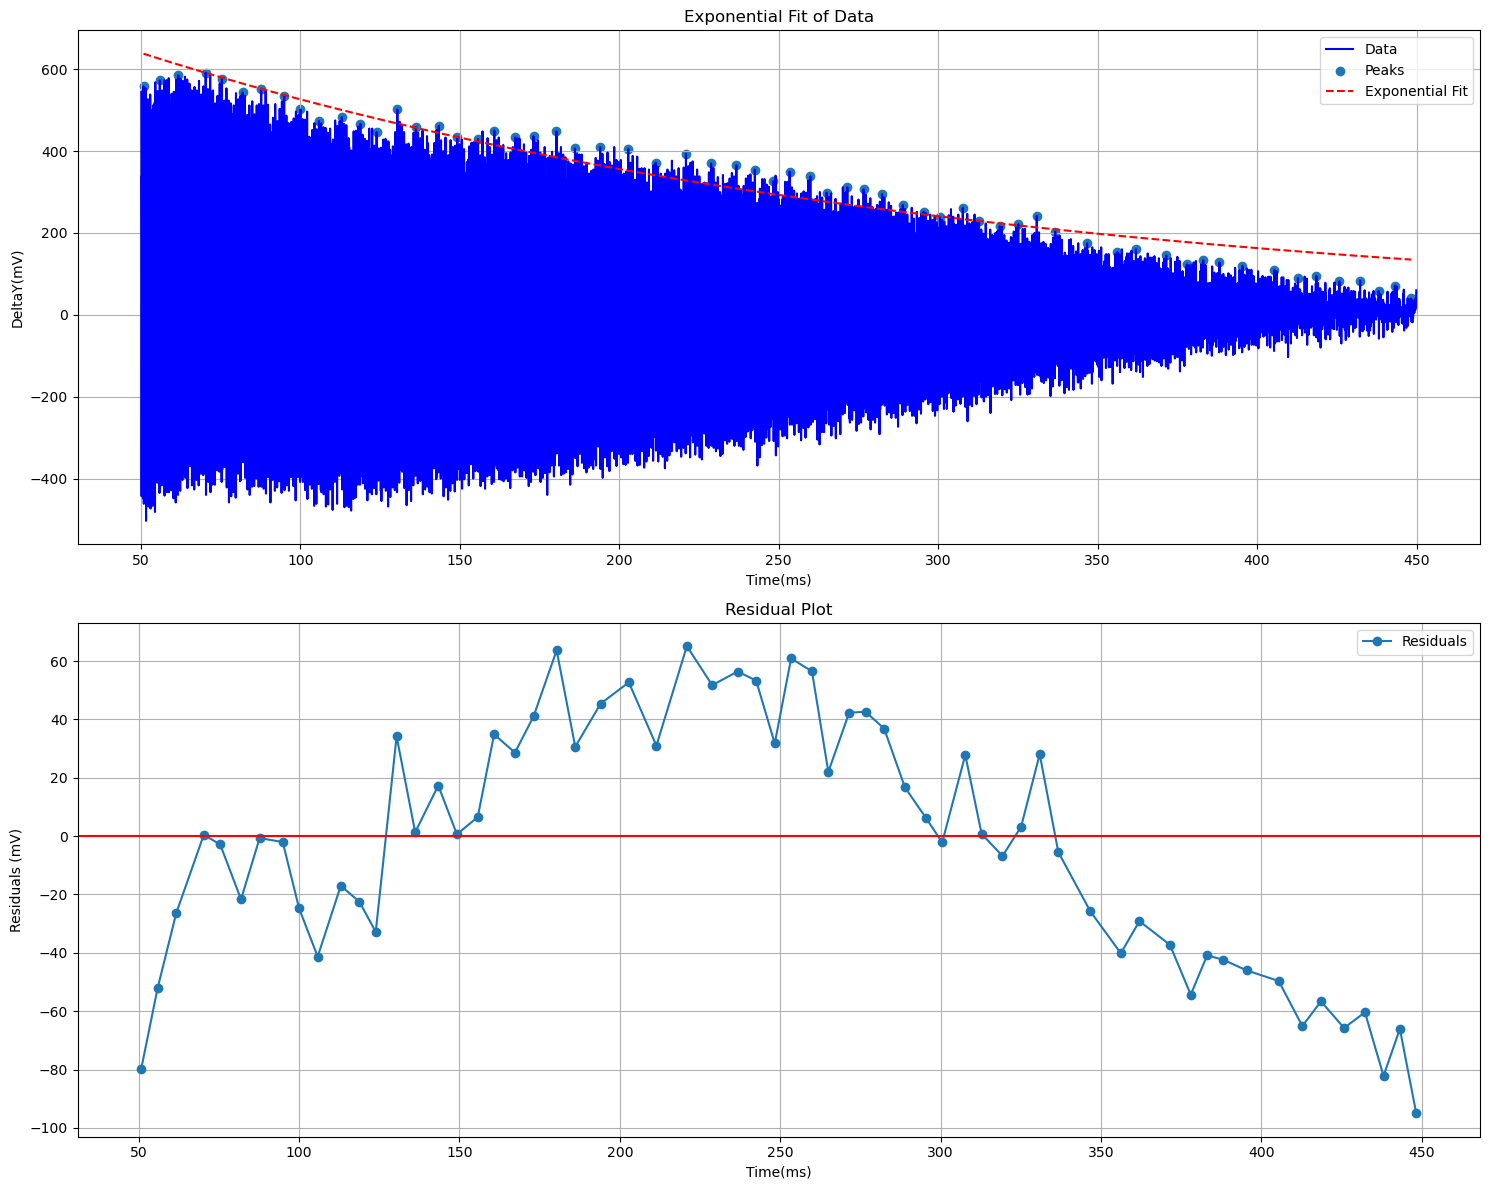

File4:

Amplitude: 897.3104719136211
T2*: 198.64449412892074 +/- 8.751647776954583
Root Mean Square Error (RMSE): 36.55847452202386
Mean Absolute Error (MAE): 29.729921701520233


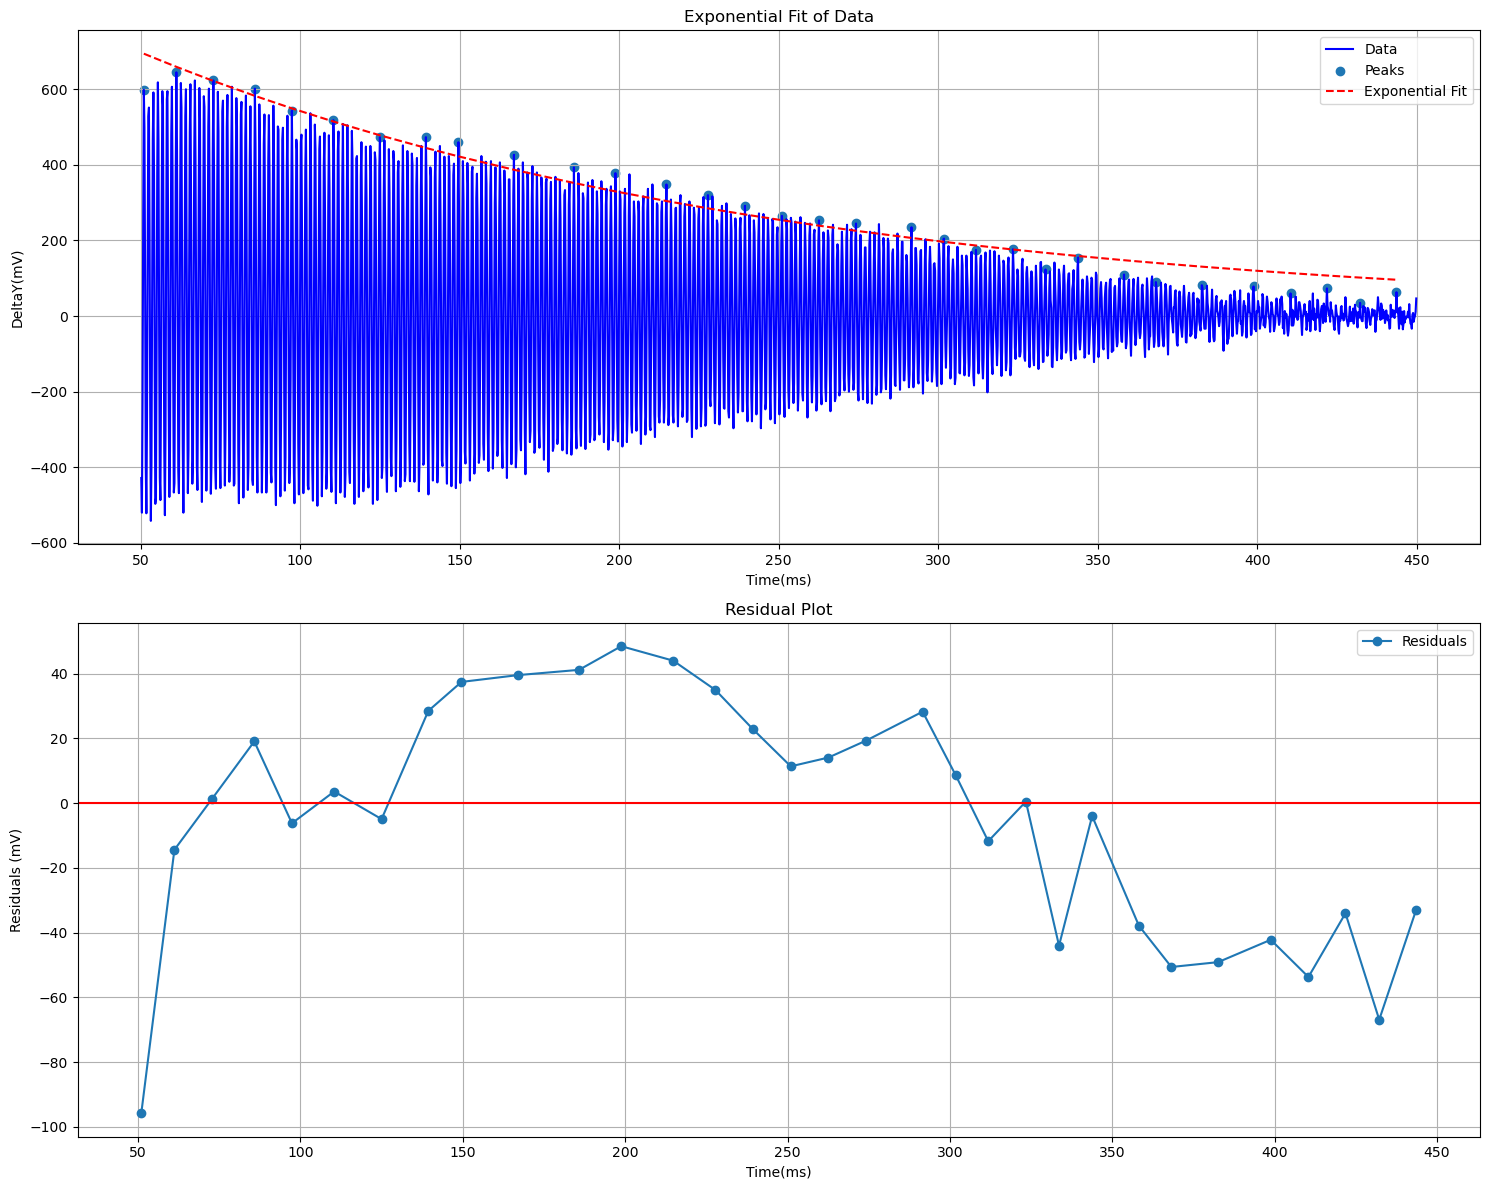

File5:

Amplitude: 784.2265414996688
T2*: 236.63993641217826 +/- 22.810894220165807
Root Mean Square Error (RMSE): 44.24491752528064
Mean Absolute Error (MAE): 39.00331098669668


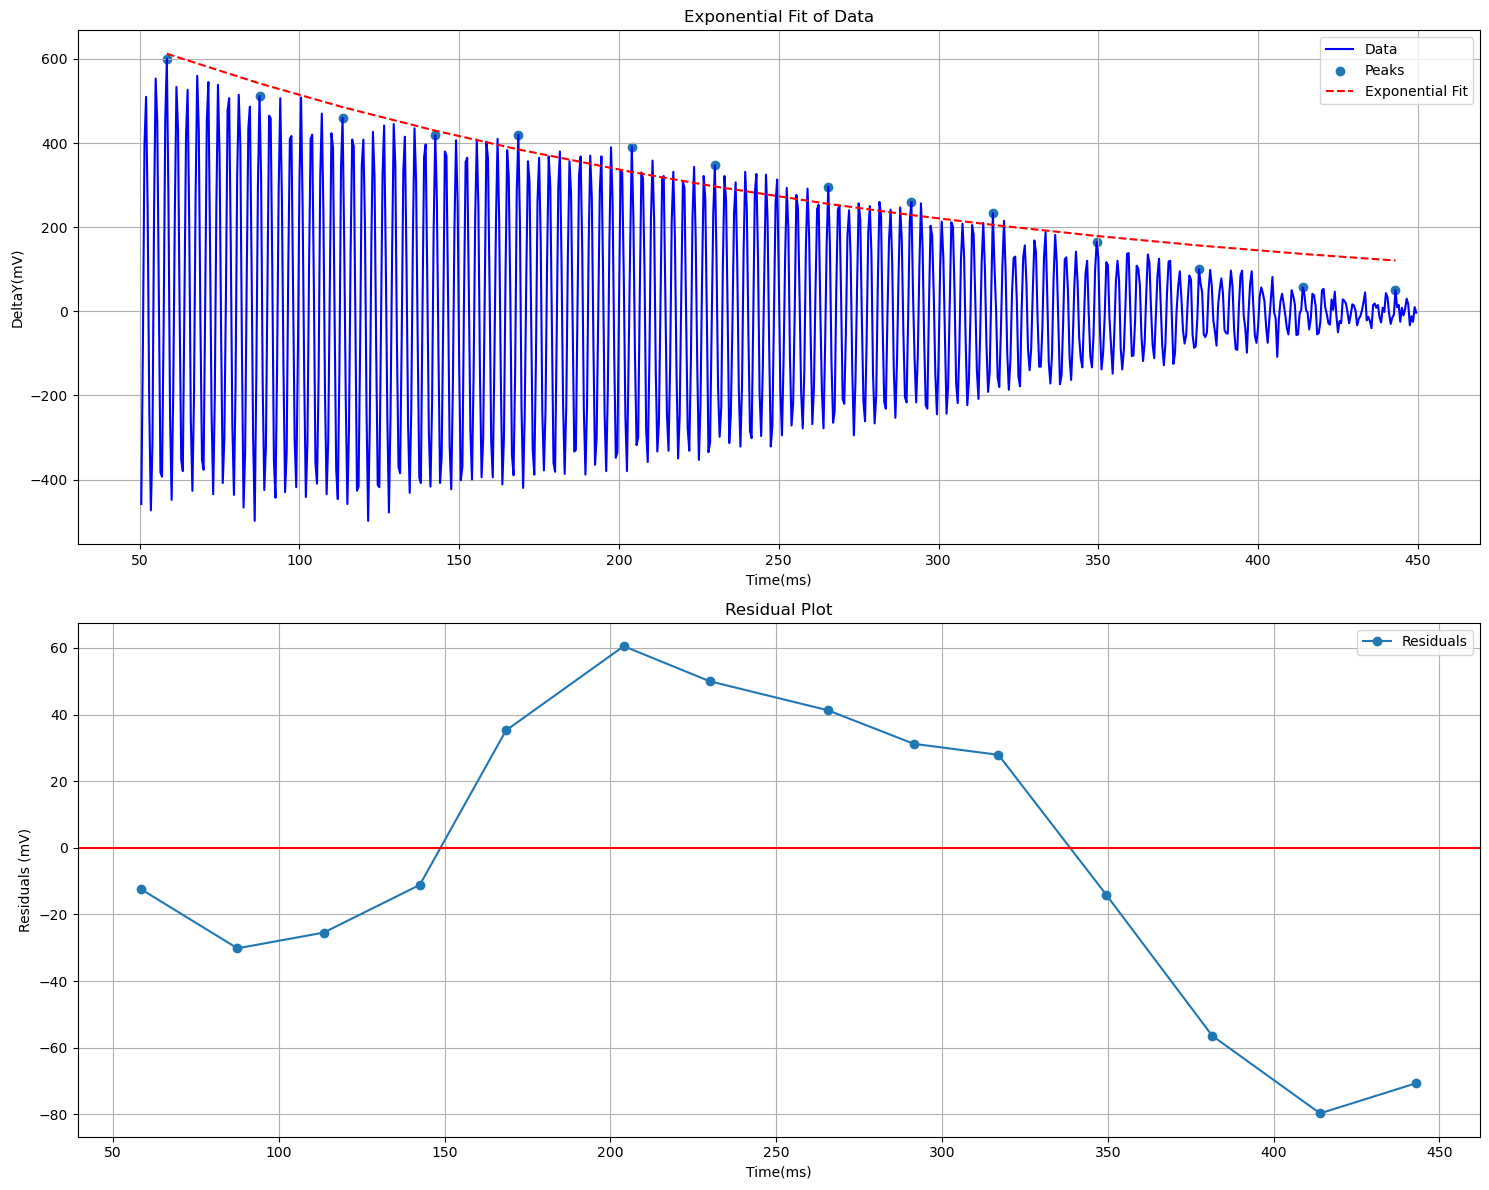

File6:

Amplitude: 899.9778063469721
T2*: 194.99132270554554 +/- 14.23891733160534
Root Mean Square Error (RMSE): 21.490801597737416
Mean Absolute Error (MAE): 18.6222077703818


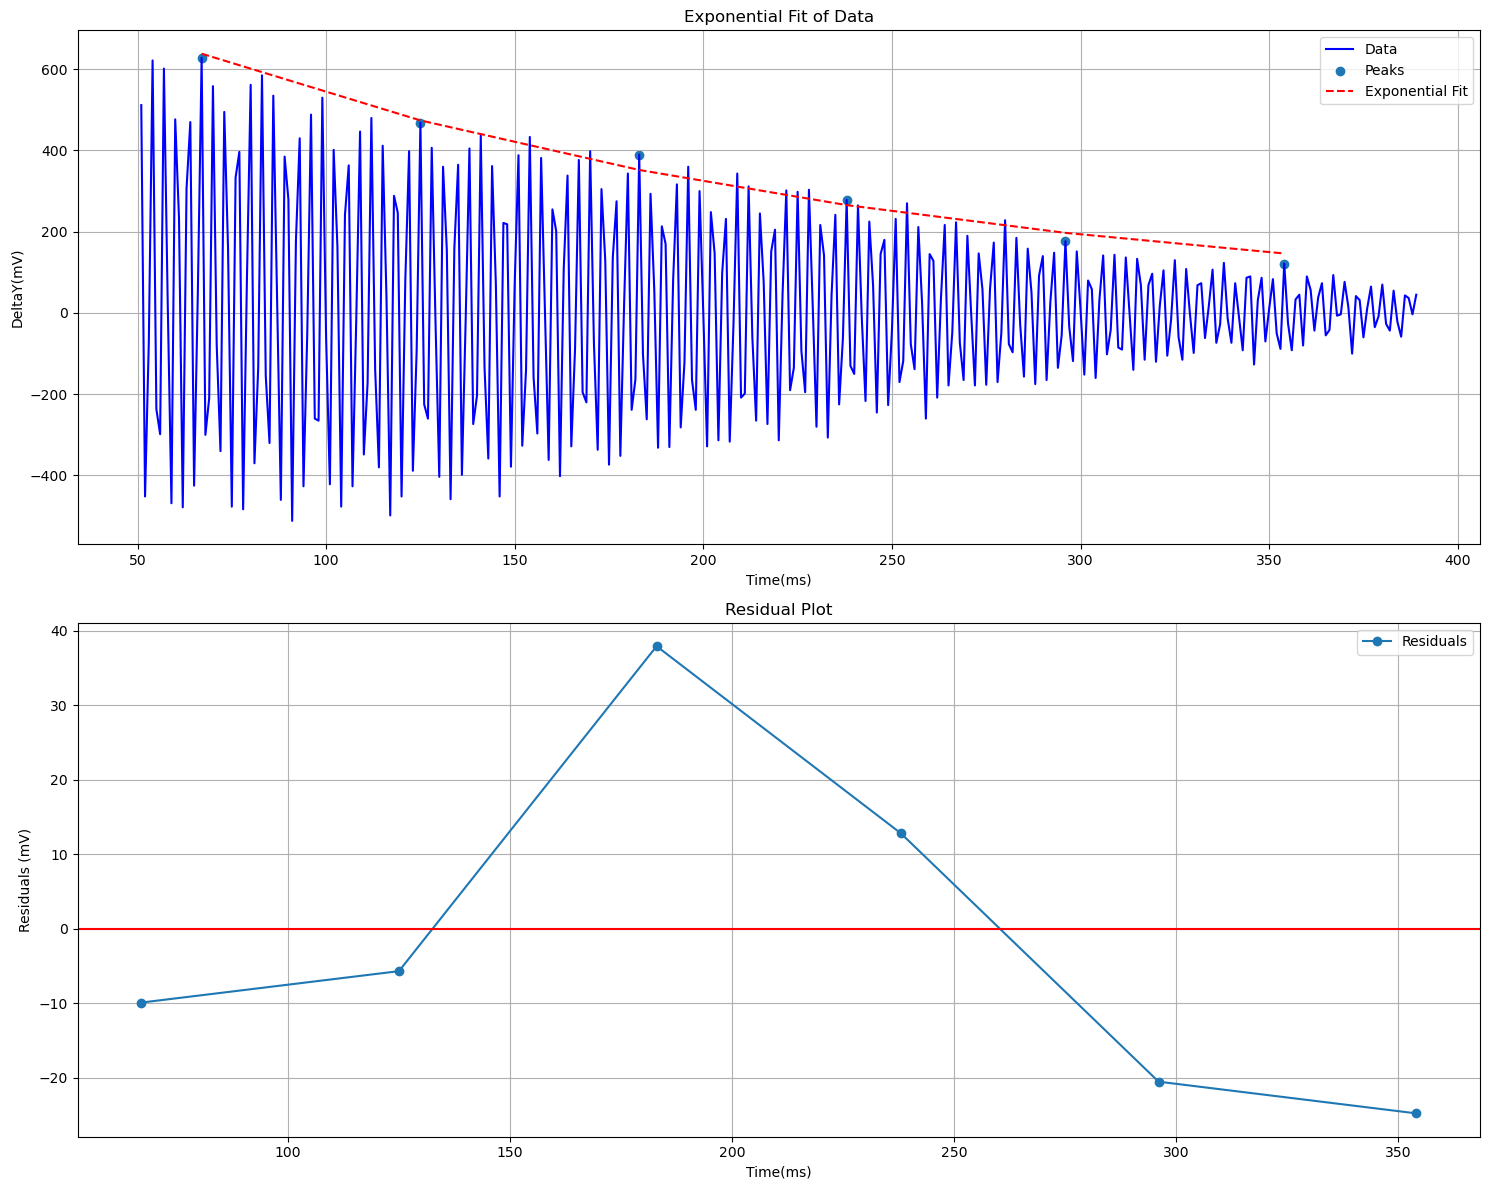

File7:

Amplitude: 764.0330432524369
T2*: 261.96398112357355 +/- 8.983789361224119
Root Mean Square Error (RMSE): 46.245882634430096
Mean Absolute Error (MAE): 39.768285917589644


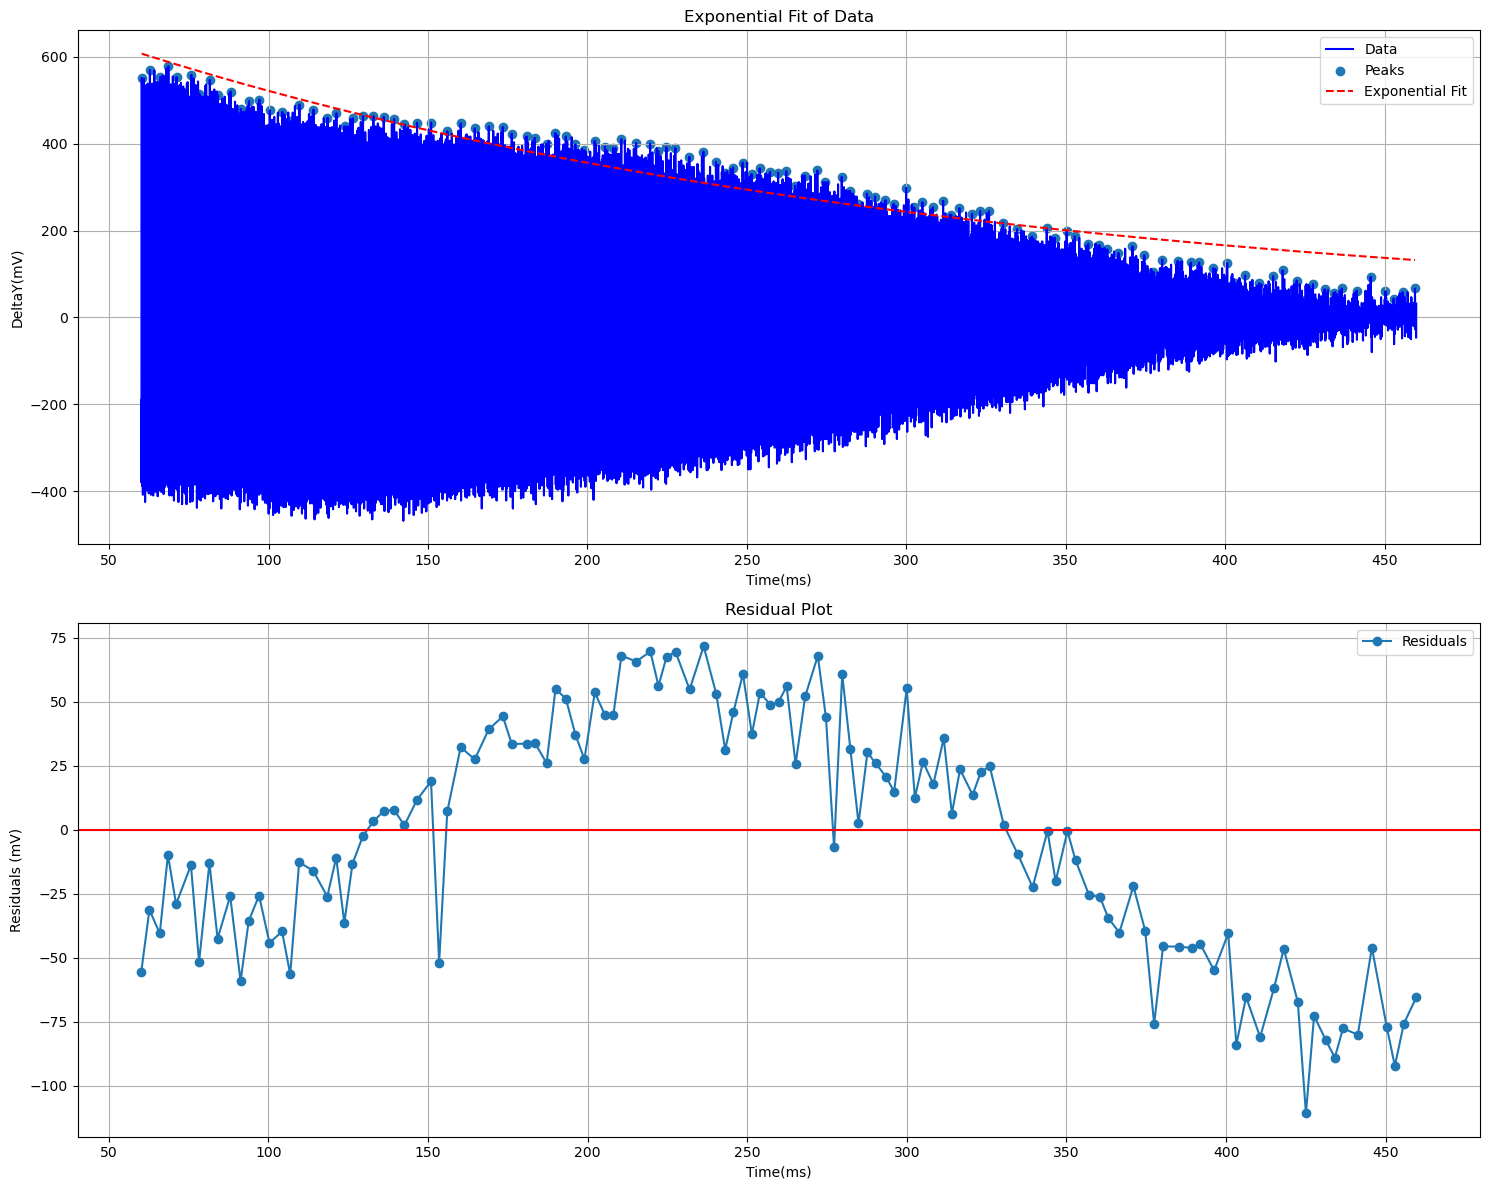

File8:

Amplitude: 786.684649164997
T2*: 243.48426334919674 +/- 21.968721343582082
Root Mean Square Error (RMSE): 44.35047935406585
Mean Absolute Error (MAE): 38.5683994625752


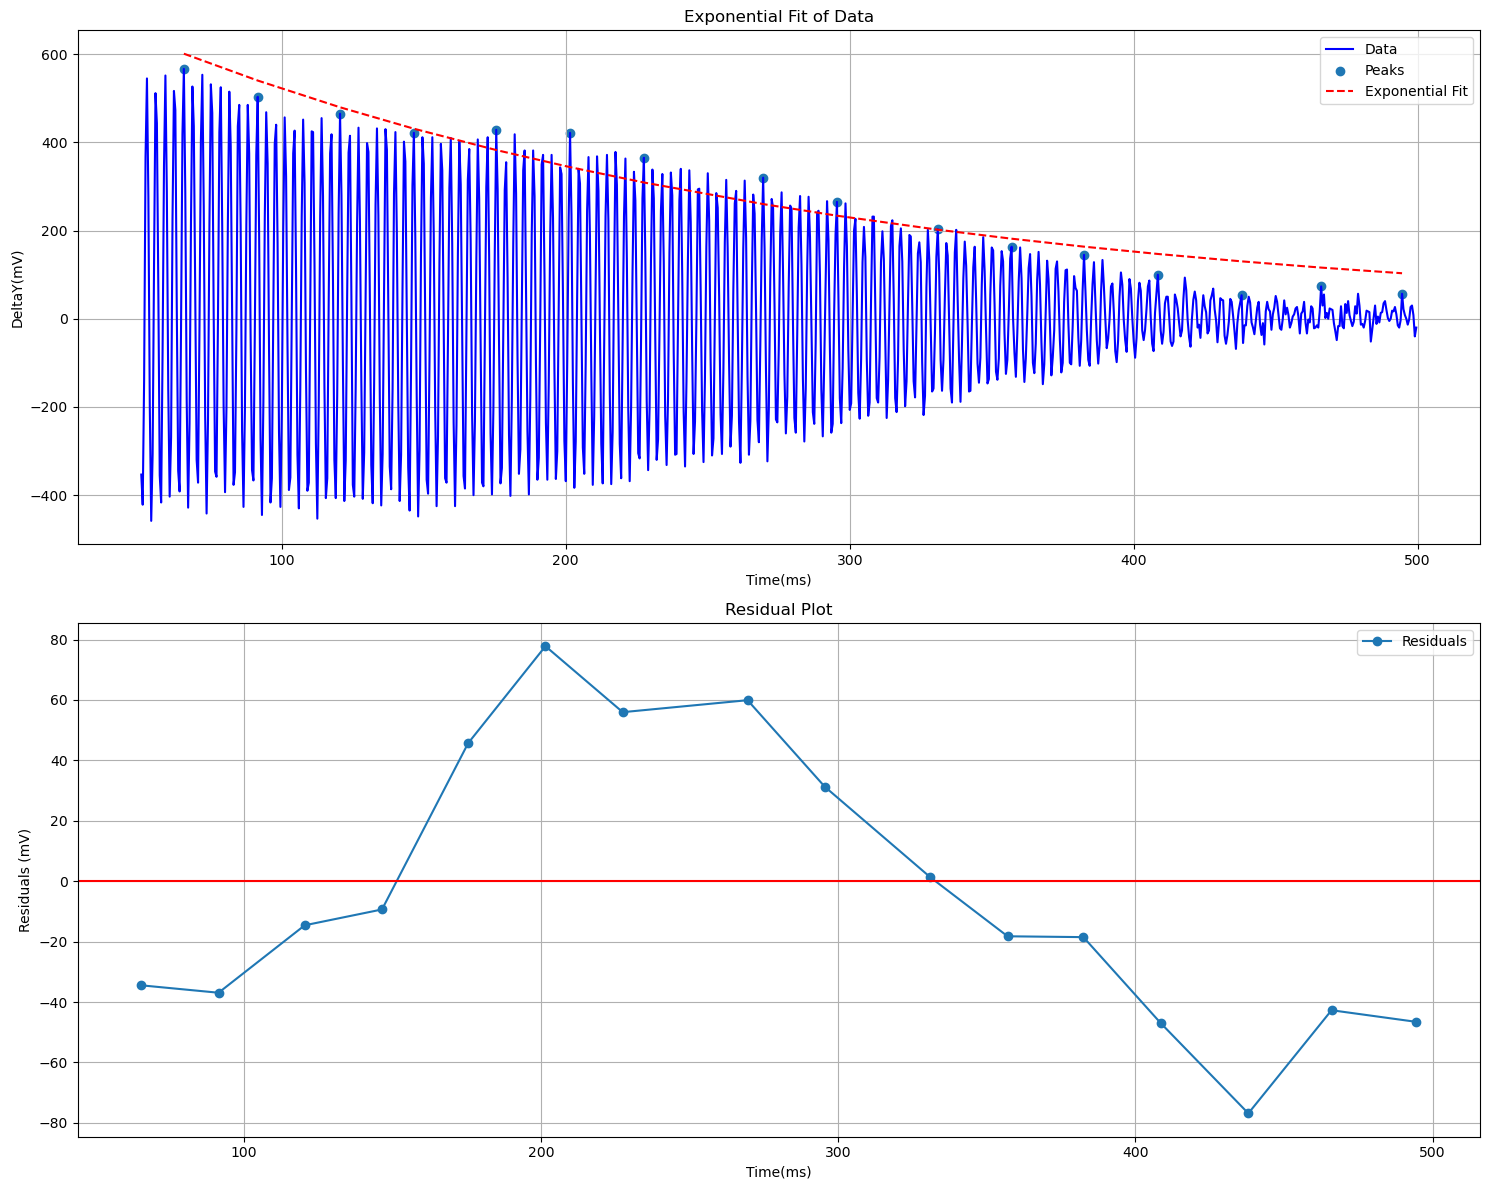

File9:

Amplitude: 722.7380956559108
T2*: 271.1466928085246 +/- 31.375876224679956
Root Mean Square Error (RMSE): 47.29792025764023
Mean Absolute Error (MAE): 40.88347316641015


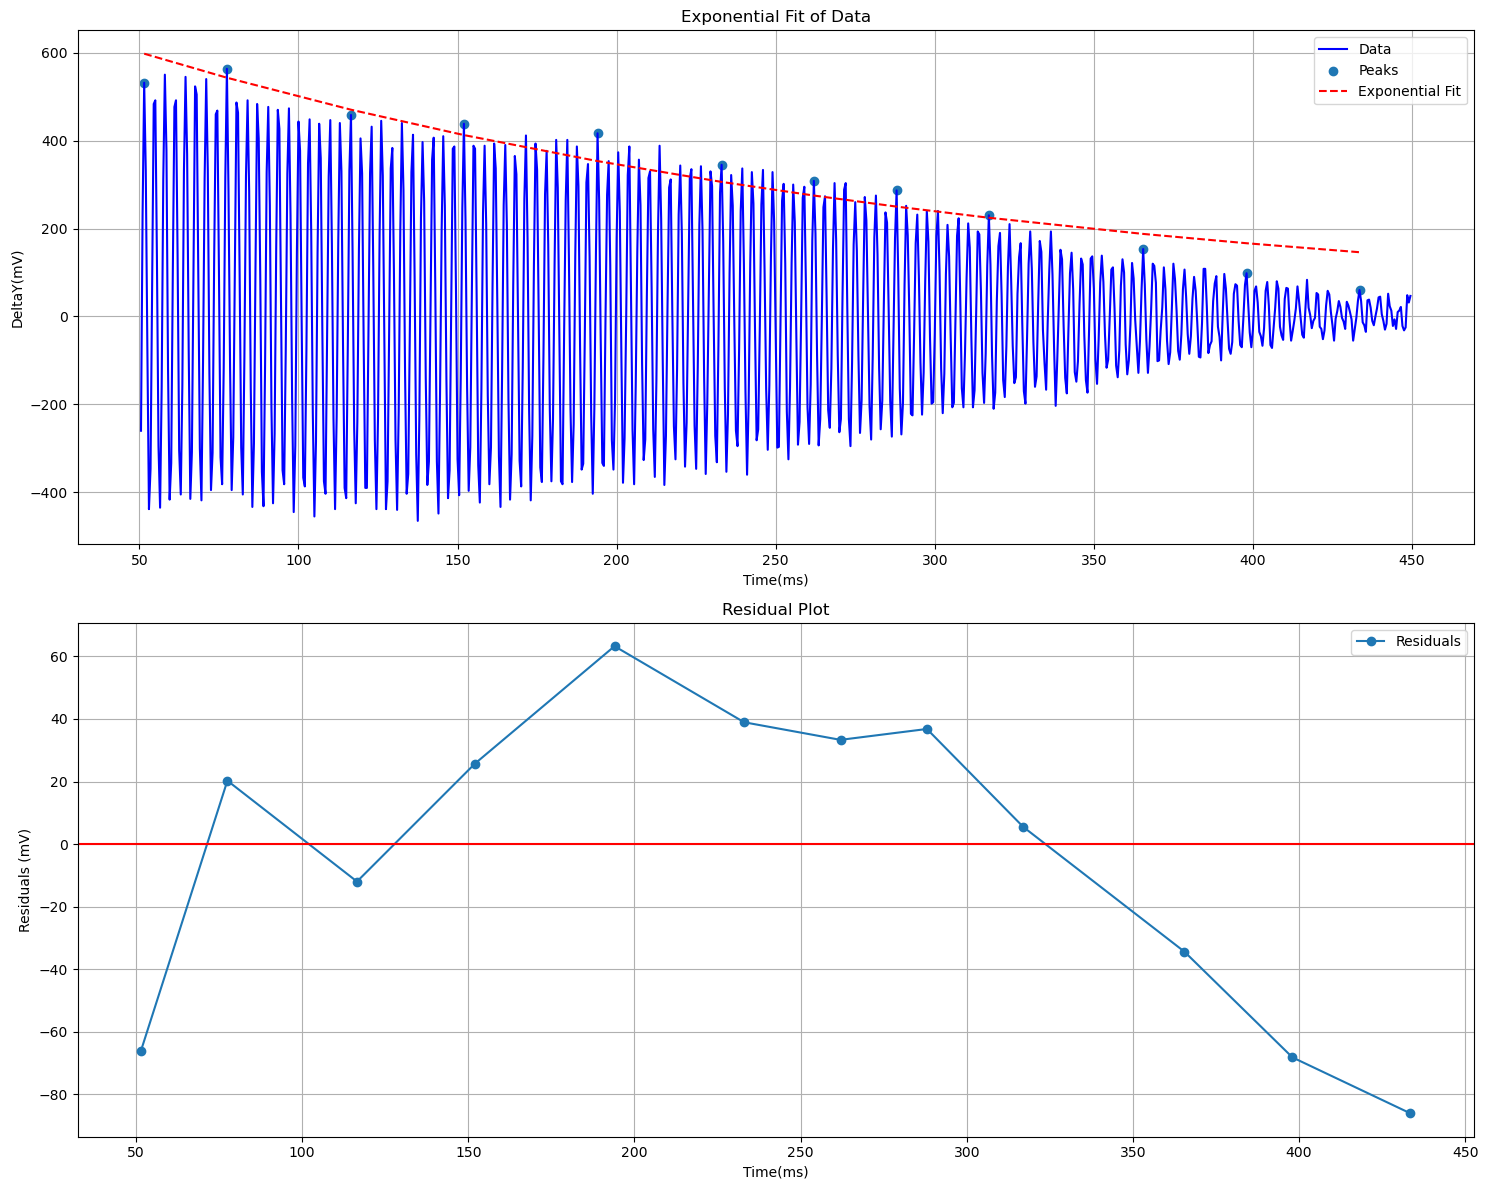

File10:

Amplitude: 749.4043623383857
T2*: 260.3017394347846 +/- 25.729619014841113
Root Mean Square Error (RMSE): 41.68299231642413
Mean Absolute Error (MAE): 36.29838343245476


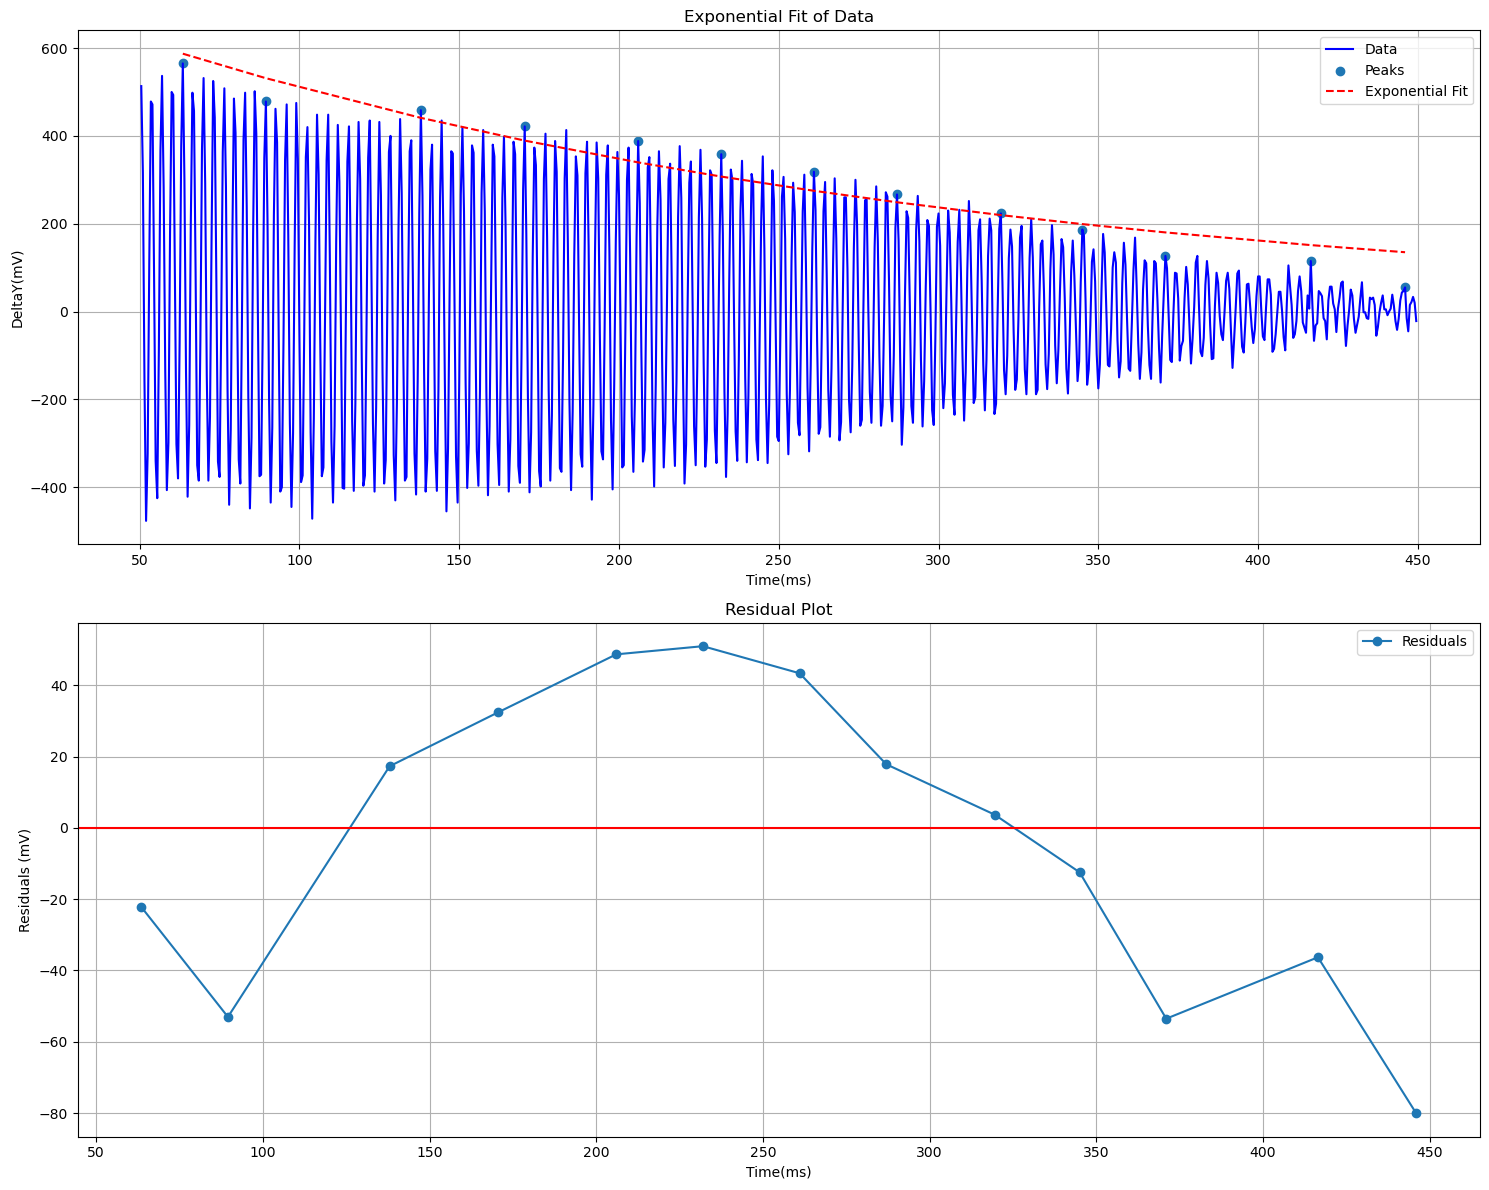

File11:

Amplitude: 650.990846886716
T2*: 381.1005665456942 +/- 72.18585527925683
Root Mean Square Error (RMSE): 24.184864448197253
Mean Absolute Error (MAE): 20.23984690366045


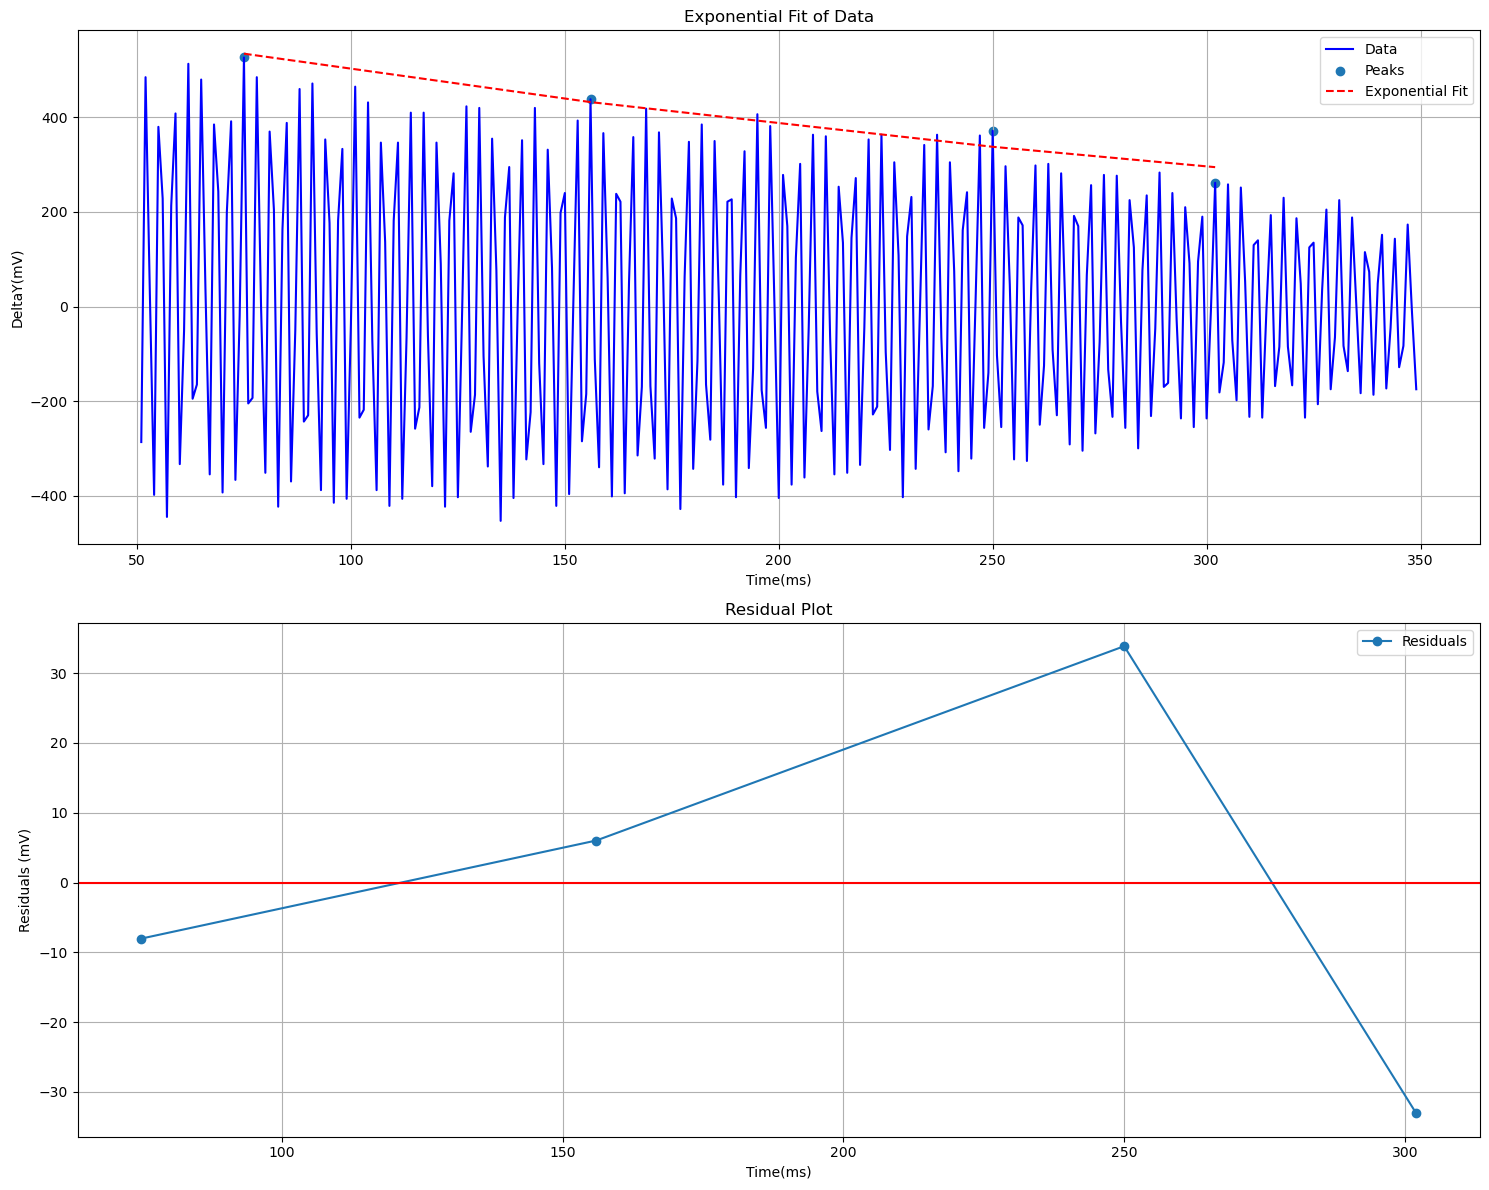

File12:

Amplitude: 814.0887982840359
T2*: 229.3412238464736 +/- 12.458092096358381
Root Mean Square Error (RMSE): 43.03603488362775
Mean Absolute Error (MAE): 36.43107350163299


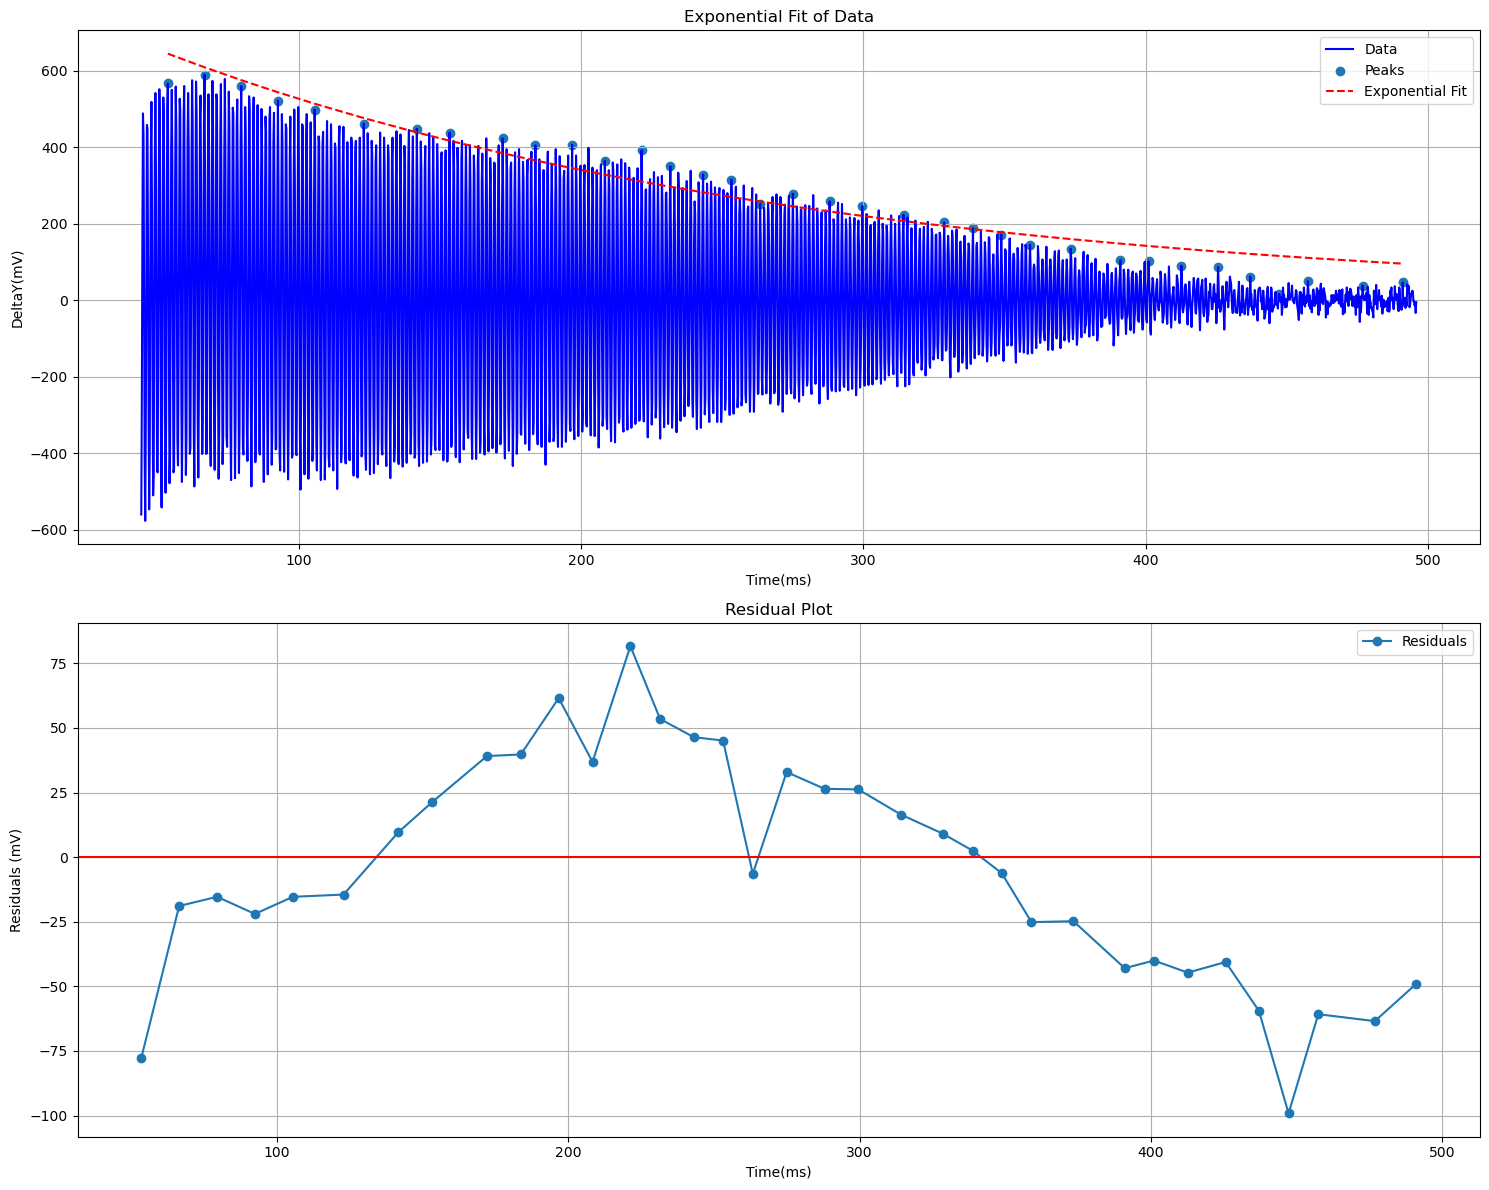

File13:

Amplitude: 683.1739864364906
T2*: 253.241534678776 +/- 66.60390860424177
Root Mean Square Error (RMSE): 45.09520984719462
Mean Absolute Error (MAE): 41.85153153949522


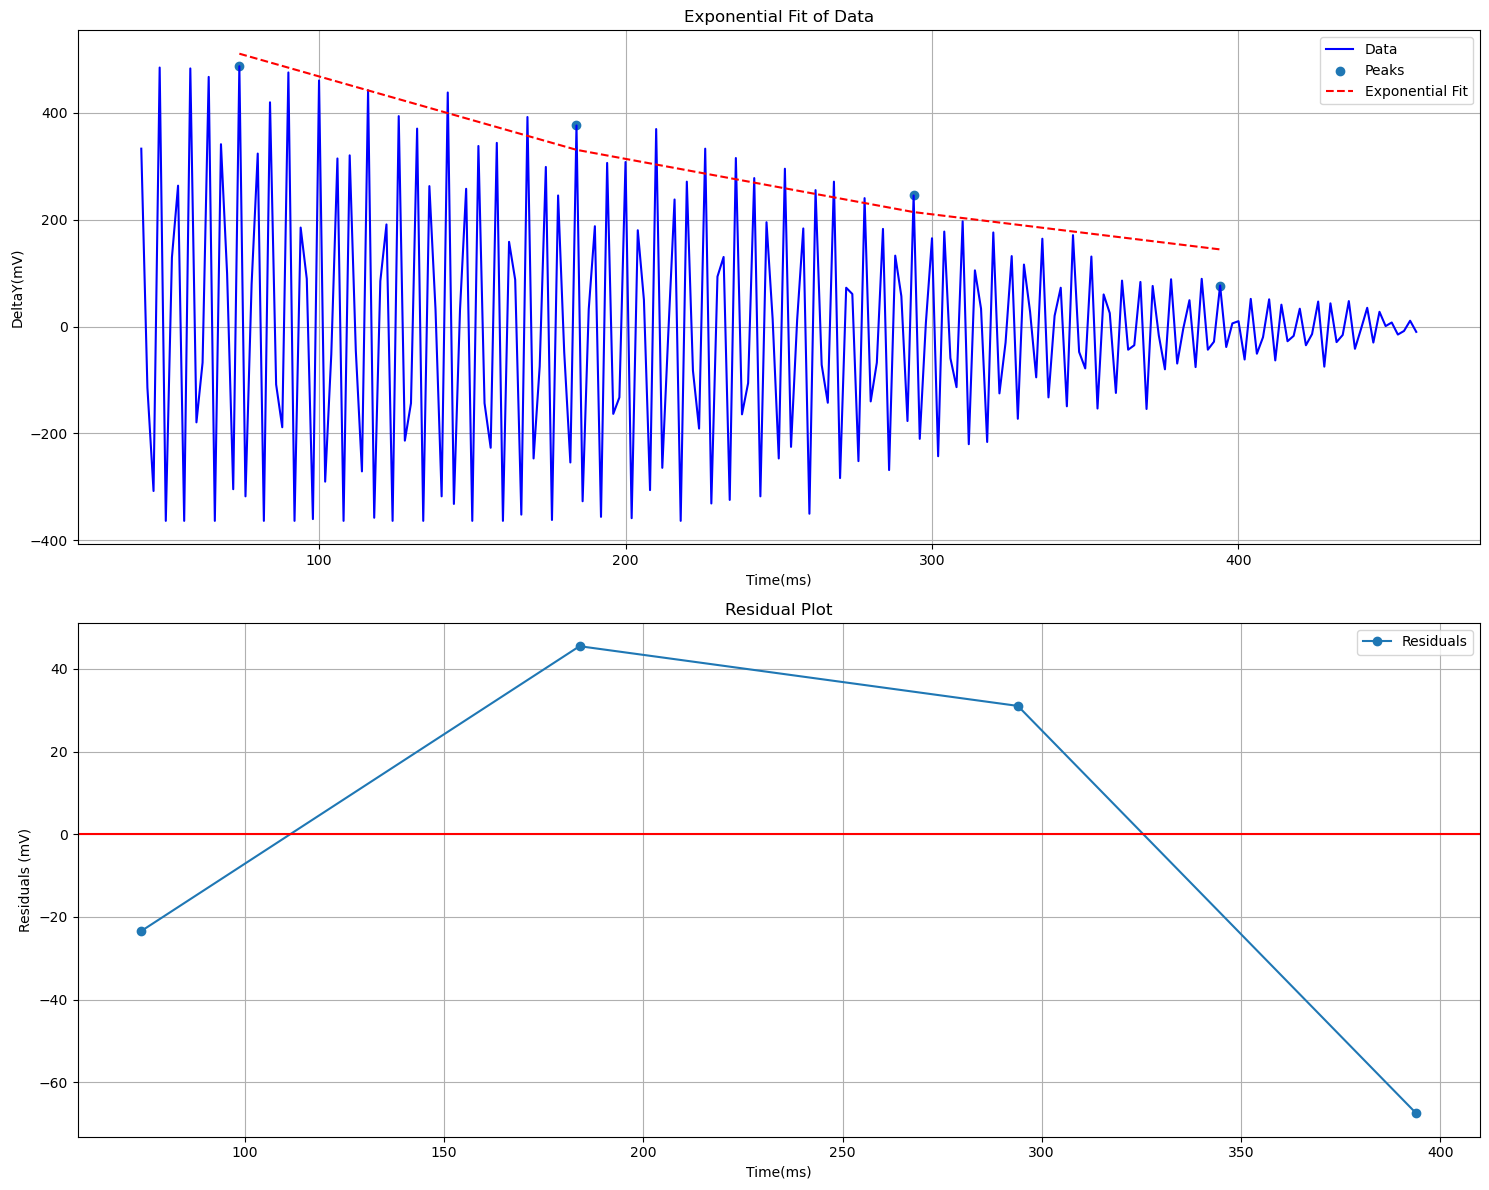

249.47951151428708
59.17397160877565


In [9]:
# Define the function for exponential fit
def exponential_func(x, a, tau):
    return a * np.exp(-x / tau)
  
T2_values = []
std_values = []

# Iterate over the files
for i in range(1, 14):
    # Read the CSV file
    filename = f"File{i}/File{i}_fid.csv"
    fid_signal = pd.read_csv(filename, skiprows = lambda x: x % 10 != 0, engine="python")
    
    # Scale the values in the DataFrame
    fid_signal.iloc[:, 0] *= 10e5
    fid_signal.iloc[:, 1] *= 10e2
        
    # Rename the columns for clarity
    fid_signal.columns = ["Time(ms)", "DeltaY(mV)"]
    
    # Create a new figure with two subplots
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))
    
    # Find peaks and perform exponential fit
    peaks_ind, _ = find_peaks(fid_signal.iloc[:, 1], height=0, prominence=0.5, distance=50)
    x_peaks = fid_signal.iloc[:, 0][peaks_ind]
    peaks = fid_signal.iloc[:, 1][peaks_ind]
    popt, pcov = curve_fit(exponential_func, x_peaks, peaks, p0=[600, 200])
    std_dev_T2 = np.sqrt(pcov[1, 1])
    std_values.append(std_dev_T2)
    
    # Plot the exponential fit on the first subplot
    axes[0].plot(fid_signal.iloc[:, 0], fid_signal.iloc[:, 1], label='Data', color = "blue")
    axes[0].scatter(x_peaks, peaks, label='Peaks', marker='o')
    axes[0].plot(x_peaks, exponential_func(x_peaks, *popt), label='Exponential Fit', color = "red", linestyle='--')
    axes[0].set_xlabel("Time(ms)")
    axes[0].set_ylabel("DeltaY(mV)")
    axes[0].set_title('Exponential Fit of Data')
    axes[0].legend()
    axes[0].grid(True)
    
    # Calculate the fitted values and residuals
    fitted_values = exponential_func(x_peaks, *popt)
    residuals = peaks - fitted_values
    
    # Plot the residuals on the second subplot
    axes[1].plot(x_peaks, residuals, label='Residuals', marker='o')
    axes[1].axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0 for reference
    axes[1].set_xlabel(fid_signal.columns[0])
    axes[1].set_ylabel('Residuals (mV)')
    axes[1].set_title('Residual Plot')
    axes[1].legend()
    axes[1].grid(True)
    
    # Calculate Root Mean Square Error (RMSE) and Mean Absolute Error (MAE)
    rmse = np.sqrt(np.mean(residuals**2))
    mae = np.mean(np.abs(residuals))
    
    T2_values.append([popt[1], std_dev_T2])
    
    # Print file
    print(f"File{i}:\n")
    # Print popt
    print(f"Amplitude: {popt[0]}")
    print(f"T2*: {popt[1]} +/- {std_dev_T2}")

    print("Root Mean Square Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    
    # Show the figure for the current cycle
    plt.tight_layout()
    plt.show()
    
print(np.mean([T2_values[i][0] for i in range(0, len(T2_values))]))
std_values = std_values[:10]
print(np.sqrt(np.sum(np.square(np.array(std_values)))))

### 4\.

Explain the pulses sequence used to measure the spin-spin relaxation time T2. What is the effect of the second pulse on each precessing spin and in turn on the magnetization vector?
A pictorial representation can be also used here.

### 5\.

Report in a table the maximum amplitude of the pulse echo signal as a function of the delay between $\frac{\pi}{2}$- and $\pi$-pulses. How do you obtain the spin-spin coherence time $T_2$? Give the values obtained by the fits and discuss related errors.

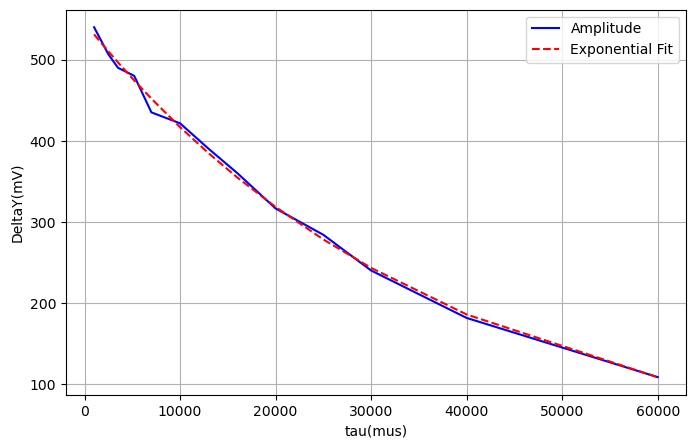

Optimized Parameters (M0, T2*): [  545.68531897 37122.75149274]
T2* = 37122.751492736075 +/- 777.1252385523817


In [10]:
peak_ampl = pd.read_excel("Amplitude_Data/Amplitude.xlsx", usecols = [5, 6], header = 1)
peak_ampl.iloc[:, 1] = peak_ampl.iloc[:, 1] / 2

def exponential_func(x, a, tau):
    return a * np.exp(-x / tau)
  
popt, pcov = curve_fit(exponential_func, peak_ampl.iloc[:, 0], peak_ampl.iloc[:, 1], p0 = [1000, 20000])
std_dev_T2 = np.sqrt(pcov[1, 1])

plt.figure(figsize=(8, 5))
plt.plot(peak_ampl.iloc[:, 0], peak_ampl.iloc[:, 1], 'b-', label='Amplitude')
plt.plot(peak_ampl.iloc[:, 0], exponential_func(peak_ampl.iloc[:, 0], *popt), 'r--', label='Exponential Fit')
plt.xlabel(peak_ampl.columns[0])
plt.ylabel(peak_ampl.columns[1])
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimized Parameters (M0, T2*): {popt}")
print(f"T2* = {popt[1]} +/- {std_dev_T2}")

################################################

# NB: TIME DATA HERE ARE IN MICROSECONDS!!! 37000 ms -> 0.37 seconds 

### 6\.

In general the decay constant $T^⋆_2$ in the free induction decay contains the effects of the spin-spin interaction, spin-lattice relaxation, and the magnetic field inhomogeneity:
$$
\frac{1}{T^⋆_2} = \frac{1}{T_2} + \frac{1}{T_1} + \gamma _p \Delta B_0 
$$
Can you give an estimate of the field inhomogeneity across the sample?

In [11]:
print((1/250.01 - 1/37120) / (gyromag_ratio * 10 **-6)/0.571/10**-4)

1.6342209998491897


### 7\.

More studies on best T1

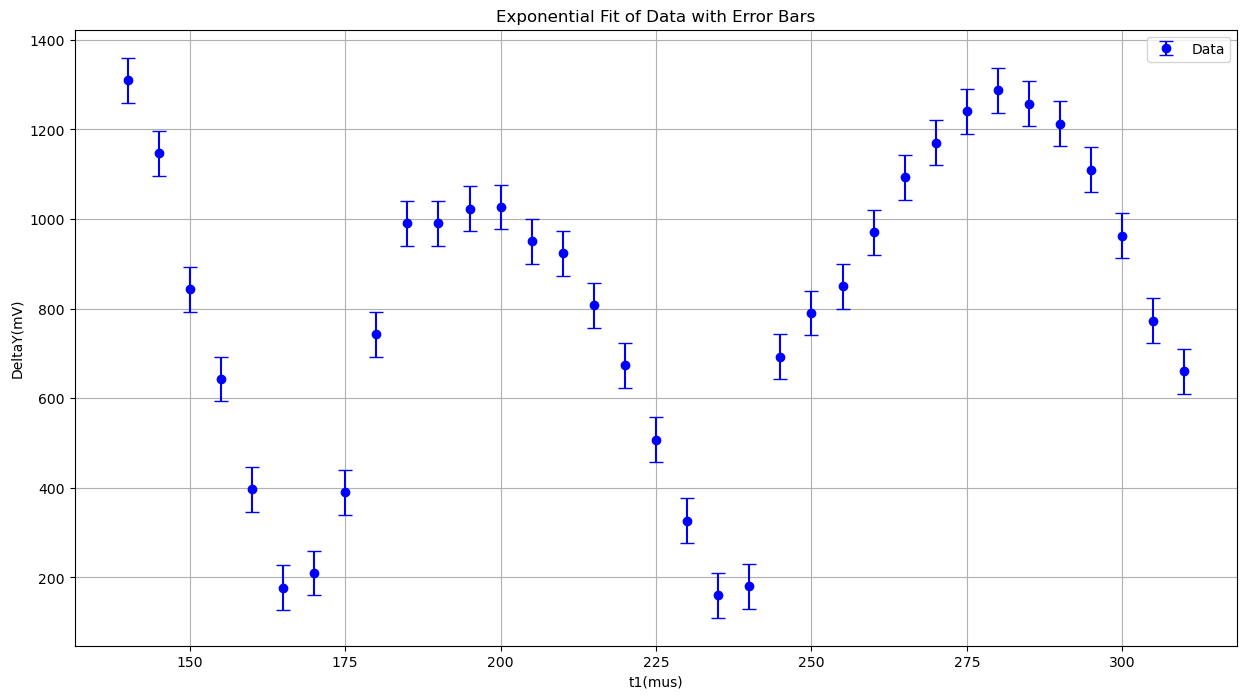

In [12]:
peak_ampl = pd.read_excel("Amplitude_Data/Amplitude.xlsx", sheet_name="Foglio2", usecols=[1, 2], header=3)
peak_ampl_err = np.full(len(peak_ampl), 50)

# Plot the data with error bars
plt.figure(figsize=(15, 8))
plt.errorbar(peak_ampl.iloc[:, 0], peak_ampl.iloc[:, 1], yerr=peak_ampl_err, fmt='o', color='blue', label='Data', capsize=5)
plt.xlabel(peak_ampl.columns[0])
plt.ylabel(peak_ampl.columns[1])
plt.title('Exponential Fit of Data with Error Bars')
plt.legend()
plt.grid(True)
plt.show()

#print(f"Optimized Parameters (M0, T2*): {popt}")
#print(f"T2* = {popt[1]} +/- {std_dev_T2}")

################################################

# NB: TIME DATA HERE ARE IN MICROSECONDS!!! 37000 ms -> 0.37 seconds 

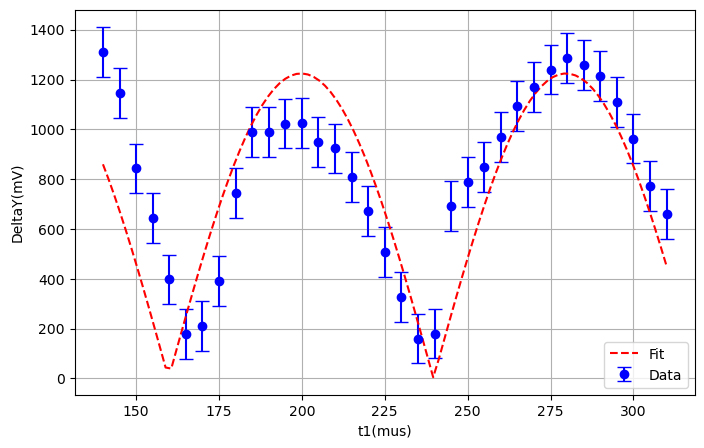

Optimal params: [1.22429497e+03 2.41116051e+09 7.98965161e+01]


In [13]:
# Define the function
def new_function(x, a, b, c):
    return a * np.abs(np.exp(-x / b) * np.sin(np.pi * x / c))

# Read data from Excel file
peak_ampl = pd.read_excel("Amplitude_Data/Amplitude.xlsx", sheet_name="Foglio2", usecols=[1, 2], header=3)
# Create an array of error values
peak_ampl_err = np.full(len(peak_ampl), 100)

# Fit the function to the data
popt, pcov = curve_fit(new_function, peak_ampl.iloc[:, 0], peak_ampl.iloc[:, 1], p0=[1000, 5200, 70])
std_dev_b = np.sqrt(pcov[1, 1])

# Generate x values for plotting the fit
x_values = np.linspace(min(peak_ampl.iloc[:, 0]), max(peak_ampl.iloc[:, 0]), 100)

# Plot the data with vertical error bars and caps
plt.figure(figsize=(8, 5))
plt.errorbar(peak_ampl.iloc[:, 0], peak_ampl.iloc[:, 1], yerr=peak_ampl_err, fmt='o', color='blue', label='Data', capsize=5)

# Plot the fit
plt.plot(x_values, new_function(x_values, *popt), 'r--', label='Fit')

plt.xlabel(peak_ampl.columns[0])
plt.ylabel(peak_ampl.columns[1])
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal params: {popt}")